In [147]:
# Importa la clase SparkSession del módulo pyspark.sql.
# SparkSession es la entrada principal para usar la API de Spark SQL.
# Proporciona un entorno unificado para trabajar con estructuras de datos, ejecutar consultas SQL y más.
from pyspark.sql import SparkSession

# Importa la clase SparkContext del módulo pyspark.
# SparkContext es el núcleo de cualquier aplicación de Spark y actúa como una interfaz para acceder al cluster de Spark.
# Es responsable de la comunicación entre la aplicación y los nodos ejecutores.
from pyspark import SparkContext

-----------------------

## Configuración e Inicio de una Sesión de Spark

In [148]:
# Crear una sesión de Spark utilizando la clase SparkSession.
# La sesión de Spark es la entrada principal para trabajar con DataFrames y la API de Spark SQL.
Session_spark  = SparkSession \
          .builder \
          .appName("Demo_Spark") \
          .getOrCreate()

### Explicación del Código: Crear una Sesión de Spark

#### Detalle de cada línea:

1. **`SparkSession`:**  
   Representa el punto de entrada principal para trabajar con Apache Spark. Facilita el uso de DataFrames y la API de Spark SQL.

2. **`.builder`:**  
   Inicia la configuración para una nueva sesión de Spark. Es el lugar donde se definen las propiedades iniciales, como el nombre de la aplicación y otros ajustes opcionales.

3. **`.appName("Demo_Spark")`:**  
   Especifica un nombre para la aplicación. Este nombre se usa para identificar la aplicación en las herramientas de administración y monitorización de Spark, como su interfaz web.

4. **`.getOrCreate()`:**  
   - Si ya existe una sesión de Spark activa en el contexto, la reutiliza.  
   - Si no hay una sesión activa, crea una nueva con las configuraciones definidas previamente.

### Notas adicionales:
- Este código es esencial para inicializar el entorno de trabajo en Spark y comenzar a procesar datos.
- Configuraciones adicionales, como la asignación de memoria, recursos o la URL del cluster, pueden incluirse en la fase de construcción (`builder`).
- El nombre definido en `.appName()` es útil para identificar las aplicaciones en entornos con múltiples trabajos Spark en ejecución.

---------------------------

## Acceder a SparkContext desde SparkSession

In [149]:
SpContext = Session_spark.sparkContext

#### Detalle de la línea:

1. **`SpContext = spark.sparkContext`:**  
   - **`spark`:** Es la instancia de `SparkSession` que se ha creado previamente en el código.
   - **`sparkContext`:** Es una propiedad de la clase `SparkSession` que proporciona acceso al objeto `SparkContext`. `SparkContext` es el componente central que se utiliza para interactuar con el cluster de Spark y distribuir las tareas entre los nodos.
   - **`SpContext`:** Es la variable donde se almacena el objeto `SparkContext`, permitiendo interactuar con él para realizar operaciones en el cluster de Spark, como crear RDDs, configurar el entorno de ejecución, entre otras tareas.

#### Notas adicionales:
- Aunque `SparkContext` se puede acceder directamente a través de `SparkSession`, algunas tareas avanzadas requieren interactuar con `SparkContext` directamente. Por ejemplo, crear RDDs o trabajar con configuraciones de bajo nivel.
- En la mayoría de los casos, el acceso a `sparkContext` se realiza a través de la instancia de `SparkSession`, como se hace aquí, para facilitar el manejo de recursos y la inicialización del entorno de Spark.

------------------------

## CARGA DE DATOS

In [150]:
data = Session_spark.read.csv('cars.csv', header=True, sep=";")
data.show(5)

+--------------------+----+---------+------------+----------+------+------------+-----+------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevell...|18.0|        8|       307.0|     130.0| 3504.|        12.0|   70|    US|
|   Buick Skylark 320|15.0|        8|       350.0|     165.0| 3693.|        11.5|   70|    US|
|  Plymouth Satellite|18.0|        8|       318.0|     150.0| 3436.|        11.0|   70|    US|
|       AMC Rebel SST|16.0|        8|       304.0|     150.0| 3433.|        12.0|   70|    US|
|         Ford Torino|17.0|        8|       302.0|     140.0| 3449.|        10.5|   70|    US|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



--------------------

## Conociendo la Data

In [151]:
# El método printSchema() se utiliza para imprimir la estructura del esquema del DataFrame.
# Esto incluye los nombres de las columnas, los tipos de datos asociados a cada columna y si estas pueden contener valores nulos (nullable).
# Es especialmente útil para verificar la estructura de los datos antes de realizar transformaciones o análisis.
data.printSchema()

root
 |-- Car: string (nullable = true)
 |-- MPG: string (nullable = true)
 |-- Cylinders: string (nullable = true)
 |-- Displacement: string (nullable = true)
 |-- Horsepower: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Origin: string (nullable = true)



## Explicación del Dataset y Plan para el ETL

### Descripción del Esquema del Dataset

El dataset contiene información de automóviles con las siguientes columnas:

- **Car** (`string`, nullable): El nombre y modelo del automóvil.
- **MPG** (`string`, nullable): Millas por galón que puede recorrer el automóvil (rendimiento).
- **Cylinders** (`string`, nullable): Número de cilindros del motor.
- **Displacement** (`string`, nullable): Cilindrada o volumen de desplazamiento del motor (generalmente en pulgadas cúbicas).
- **Horsepower** (`string`, nullable): Potencia del motor en caballos de fuerza.
- **Weight** (`string`, nullable): Peso del automóvil (posiblemente en libras).
- **Acceleration** (`string`, nullable): Tiempo que tarda en acelerar de 0 a 60 mph (en segundos).
- **Model** (`string`, nullable): Año del modelo del automóvil.
- **Origin** (`string`, nullable): Procedencia del automóvil (e.g., `US`, `Europe`, `Japan`).

#### Observaciones del Esquema
1. Todas las columnas tienen tipo `string`, lo cual no es óptimo para realizar análisis o cálculos numéricos. Necesitamos convertirlas a los tipos de datos correctos (e.g., `double` o `int`).
2. La columna `nullable` indica que puede haber valores nulos en estas columnas, por lo que debemos manejarlos durante el proceso de limpieza de datos.

### Plan para el ETL (Extract, Transform, Load)

#### 1. **Extracción**
   - Leeremos los datos desde el archivo `cars.csv` utilizando PySpark, asegurándonos de que los encabezados sean detectados correctamente.

#### 2. **Transformación**
   - **Conversión de Tipos de Datos**: 
     Convertir las columnas numéricas (`MPG`, `Cylinders`, `Displacement`, `Horsepower`, `Weight`, `Acceleration`, `Model`) a sus tipos adecuados (`double` o `int`).
   - **Manejo de Valores Nulos**: 
     Imputar valores nulos en las columnas donde sea necesario o eliminar filas con datos incompletos si no son significativos.
   - **Normalización de Datos**:
     Si fuera necesario, escalar las columnas numéricas para estandarizar los valores.
   - **Creación de Nuevas Columnas** (Opcional): 
     Añadir columnas derivadas de las existentes, como categorías basadas en `MPG` (e.g., bajo, medio, alto consumo).

#### 3. **Carga**
   - Guardar el DataFrame limpio y transformado en un formato adecuado (e.g., CSV, Parquet) para su posterior análisis.

--------------------------

### Punto 2: Transformación

#### 1. **Conversión de Tipos de Datos**
Para realizar análisis y cálculos correctos, las columnas numéricas deben ser convertidas a sus tipos adecuados:

- **Columnas a convertir:**
  - `MPG`: Rendimiento, convertir a tipo `double`.
  - `Cylinders`: Número entero de cilindros, convertir a tipo `int`.
  - `Displacement`: Cilindrada del motor, convertir a tipo `double`.
  - `Horsepower`: Potencia en caballos, convertir a tipo `double`.
  - `Weight`: Peso del vehículo, convertir a tipo `double`.
  - `Acceleration`: Tiempo de aceleración, convertir a tipo `double`.
  - `Model`: Año del modelo, convertir a tipo `int`.

**Acción**: Utilizaremos la función `cast()` de PySpark para cambiar los tipos de datos.

#### 2. **Manejo de Valores Nulos**
Los valores nulos pueden afectar el análisis. Realizaremos las siguientes acciones según la columna:
- **Estrategias:**
  - Para columnas numéricas: Sustituir los valores nulos por la media o mediana de la columna (imputación).
  - Para columnas categóricas (e.g., `Origin`): Sustituir los valores nulos con el valor más frecuente (moda).
  - Si hay demasiados valores nulos en ciertas filas, podrían eliminarse.

**Acción**: Utilizaremos funciones como `fillna()` o `dropna()` para manejar estos casos.

#### 3. **Normalización de Datos**
Estandarizar los valores de las columnas numéricas para asegurar que estén en rangos similares, lo cual es importante para modelos de Machine Learning.
- **Estrategias:**
  - Aplicar normalización Min-Max o estandarización (z-score) en columnas como `Weight`, `Horsepower` y `Acceleration`.

**Acción**: Utilizaremos funciones de PySpark como `StandardScaler` o realizaremos operaciones manuales con `withColumn`.

#### 4. **Creación de Nuevas Columnas (Opcional)**
Podemos derivar información adicional:
- **Ejemplo**: Categorizar `MPG` en niveles de consumo:
  - `MPG < 15`: Bajo consumo.
  - `15 ≤ MPG ≤ 25`: Consumo medio.
  - `MPG > 25`: Alto consumo.

**Acción**: Utilizaremos `withColumn()` y expresiones condicionales (`when` y `otherwise`) de PySpark.

-------------------------

#### 1. **Conversión de Tipos de Datos**

In [152]:
from pyspark.sql.types import DoubleType, IntegerType

# Convertir los tipos de datos de las columnas utilizando cast().
data = data \
    .withColumn("MPG", data["MPG"].cast(DoubleType())) \
    .withColumn("Cylinders", data["Cylinders"].cast(IntegerType())) \
    .withColumn("Displacement", data["Displacement"].cast(DoubleType())) \
    .withColumn("Horsepower", data["Horsepower"].cast(DoubleType())) \
    .withColumn("Weight", data["Weight"].cast(DoubleType())) \
    .withColumn("Acceleration", data["Acceleration"].cast(DoubleType())) \
    .withColumn("Model", data["Model"].cast(IntegerType()))

In [153]:
data.printSchema()

root
 |-- Car: string (nullable = true)
 |-- MPG: double (nullable = true)
 |-- Cylinders: integer (nullable = true)
 |-- Displacement: double (nullable = true)
 |-- Horsepower: double (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Acceleration: double (nullable = true)
 |-- Model: integer (nullable = true)
 |-- Origin: string (nullable = true)



-------------------------

#### 2. **Manejo de Valores Nulos**

1. **Contar valores nulos:**

In [154]:
from pyspark.sql.functions import col, when, count, mean

In [155]:
data.select([count(when(col(c).isNull(), c)).alias(c) for c in data.columns]).show()

+---+---+---------+------------+----------+------+------------+-----+------+
|Car|MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+---+---+---------+------------+----------+------+------------+-----+------+
|  0|  0|        0|           0|         0|     0|           0|    0|     0|
+---+---+---------+------------+----------+------+------------+-----+------+



2. **Imputación de valores nulos:**

In [156]:
# Aquí calculamos la media de todas las columnas numéricas (excepto las de tipo texto como "Car" y "Origin") usando `mean()`. Luego usamos `fillna()` para rellenar los valores nulos con la media correspondiente de cada columna.

mean_values = data.select([mean(c).alias(c) for c in data.columns if c != "Car" and c != "Origin"]).first()
data = data.fillna(mean_values.asDict())

3. **Eliminar filas con valores nulos en columnas clave:**

In [157]:
# Si consideramos que las columnas "MPG", "Cylinders", "Displacement", "Horsepower", "Weight", y "Acceleration" son esenciales para el análisis, podemos eliminar las filas que contienen valores nulos en cualquiera de estas columnas usando `dropna()`.

data = data.dropna(subset=["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration"])

### Consideraciones:
- **Imputación con la media** es adecuada cuando los datos no presentan una distribución sesgada y cuando no se cuenta con un valor específico para imputar.
- **Eliminación de filas** puede ser apropiada si las filas con valores nulos son pocas o si los datos restantes son lo suficientemente representativos.

-------------------------

#### 3. **Normalización de Datos**

Para el punto de **Normalización de Datos**, existen dos estrategias comunes: **Min-Max Normalization** y **Standardization (z-score)**. A continuación, vamos a proceder con ambos enfoques utilizando PySpark.

### 1. **Normalización Min-Max (Escalado entre 0 y 1)**
La normalización Min-Max transforma los valores de las columnas numéricas a un rango [0, 1].

### 2. **Estandarización (z-score)**
La estandarización, también conocida como normalización Z-score, transforma los valores de las columnas para que tengan una media de 0 y una desviación estándar de 1.

### Código para la Normalización y Estandarización:

In [158]:
from pyspark.ml.feature import MinMaxScaler, StandardScaler, VectorAssembler
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col

# Para normalización Min-Max, primero necesitamos convertir las columnas a un formato vectorial.
# Aplicamos la normalización Min-Max a las columnas `Weight`, `Horsepower`, y `Acceleration`

# Convertir las columnas a formato vectorial para MinMaxScaler
assembler = VectorAssembler(inputCols=["Weight", "Horsepower", "Acceleration"], outputCol="features")
data_with_features = assembler.transform(data)

# Crear el objeto MinMaxScaler y ajustarlo a los datos
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(data_with_features)

# Transformar los datos
data_scaled = scaler_model.transform(data_with_features)

# Mostrar las primeras 10 filas con los valores normalizados
data_scaled.select("Car", "Weight", "Horsepower", "Acceleration", "scaled_features").show(10)

# **Estandarización (z-score):**
# Convertir las columnas a formato vectorial para StandardScaler
scaler_standard = StandardScaler(inputCol="features", outputCol="standardized_features", withStd=True, withMean=True)
scaler_model_standard = scaler_standard.fit(data_with_features)

# Transformar los datos
data_standardized = scaler_model_standard.transform(data_with_features)

# Mostrar las primeras 10 filas con los valores estandarizados
data_standardized.select("Car", "Weight", "Horsepower", "Acceleration", "standardized_features").show(10)


+--------------------+------+----------+------------+--------------------+
|                 Car|Weight|Horsepower|Acceleration|     scaled_features|
+--------------------+------+----------+------------+--------------------+
|Chevrolet Chevell...|3504.0|     130.0|        12.0|[0.53614970229656...|
|   Buick Skylark 320|3693.0|     165.0|        11.5|[0.58973631981854...|
|  Plymouth Satellite|3436.0|     150.0|        11.0|[0.51686986107173...|
|       AMC Rebel SST|3433.0|     150.0|        12.0|[0.51601927984122...|
|         Ford Torino|3449.0|     140.0|        10.5|[0.52055571307059...|
|    Ford Galaxie 500|4341.0|     198.0|        10.0|[0.77346186560816...|
|    Chevrolet Impala|4354.0|     220.0|         9.0|[0.77714771760703...|
|   Plymouth Fury iii|4312.0|     215.0|         8.5|[0.76523958037992...|
|    Pontiac Catalina|4425.0|     225.0|        10.0|[0.79727814006237...|
|  AMC Ambassador DPL|3850.0|     190.0|         8.5|[0.63425007088176...|
+--------------------+---

### Explicación:
1. **Min-Max Normalization**:
   - **VectorAssembler** convierte las columnas `Weight`, `Horsepower`, `Acceleration` en un solo vector.
   - **MinMaxScaler** se ajusta a estos datos y luego los escala al rango [0, 1].
   - **`scaled_features`** es la nueva columna donde se almacena el valor normalizado.

2. **Estandarización (z-score)**:
   - Se utiliza **StandardScaler** para estandarizar los datos (media = 0, desviación estándar = 1).
   - **`standardized_features`** es la columna resultante con los valores estandarizados.

### Resultado esperado:
- Primero, deberías ver las primeras 10 filas con la columna de valores normalizados (`scaled_features`).
- Luego, verás las primeras 10 filas con la columna de valores estandarizados (`standardized_features`).

Este código debería funcionar correctamente para realizar ambas transformaciones.

### Explicación del Código:

- **MinMaxScaler**:
  - **VectorAssembler**: Convierte las columnas seleccionadas en un vector para que el `MinMaxScaler` pueda operar sobre ellas.
  - **MinMaxScaler**: Normaliza los datos a un rango de [0, 1]. La columna `features` es la que contiene los datos a normalizar, y la columna `scaled_features` será el resultado.

- **StandardScaler**:
  - **StandardScaler**: Realiza una estandarización de las características, es decir, ajusta los datos de modo que tengan una media de 0 y una desviación estándar de 1.
  - Similar al `MinMaxScaler`, se crea un ensamblador de características y luego se aplica el `StandardScaler` a los datos para obtener las características estandarizadas.

### Resumen:
- **Min-Max Normalization** asegura que los datos estén dentro de un rango [0, 1], útil cuando es importante mantener los valores en ese rango.
- **Standardization (z-score)** ajusta los datos para que tengan una media de 0 y una desviación estándar de 1, y es útil cuando las características tienen unidades diferentes o distribuciones sesgadas.

-------------------------

#### 4. **Creación de Nuevas Columnas (Opcional)**

Para crear nuevas columnas derivadas de las existentes, podemos utilizar `withColumn()` junto con las funciones condicionales `when()` y `otherwise()` de PySpark. En este caso, vamos a crear una nueva columna que categorice el consumo de combustible (`MPG`) en tres niveles: bajo, medio y alto.

In [159]:
from pyspark.sql.functions import when, col

# Crear una nueva columna 'MPG_Category' basada en el valor de 'MPG'
data_with_category = data.withColumn(
    "MPG_Category",  # El nombre de la nueva columna
    when(col("MPG") < 15, "Bajo consumo")  # Si MPG es menor que 15, asignamos "Bajo consumo"
    .when((col("MPG") >= 15) & (col("MPG") <= 25), "Consumo medio")  # Si MPG está entre 15 y 25, asignamos "Consumo medio"
    .otherwise("Alto consumo")  # Si MPG es mayor que 25, asignamos "Alto consumo"
)

# Mostrar los primeros 5 resultados con la nueva columna
data_with_category.select("Car", "MPG", "MPG_Category").show(5)

+--------------------+----+-------------+
|                 Car| MPG| MPG_Category|
+--------------------+----+-------------+
|Chevrolet Chevell...|18.0|Consumo medio|
|   Buick Skylark 320|15.0|Consumo medio|
|  Plymouth Satellite|18.0|Consumo medio|
|       AMC Rebel SST|16.0|Consumo medio|
|         Ford Torino|17.0|Consumo medio|
+--------------------+----+-------------+
only showing top 5 rows



### Explicación del código:

1. **`withColumn()`**: Esta función se utiliza para agregar una nueva columna o modificar una columna existente en el DataFrame. En este caso, estamos agregando una nueva columna llamada `MPG_Category`.
   
2. **`when()`**: La función `when` en PySpark permite realizar una comparación condicional, similar al `if` en otros lenguajes. En este caso, estamos diciendo que si el valor de la columna `MPG` es menor que 15, entonces asignamos "Bajo consumo". Si el valor de `MPG` está entre 15 y 25, se asigna "Consumo medio". Si es mayor que 25, se asigna "Alto consumo".

3. **`otherwise()`**: Esta función se utiliza para definir lo que sucederá si ninguna de las condiciones anteriores es verdadera. En este caso, si `MPG` es mayor que 25, se asigna "Alto consumo".

4. **`col("MPG")`**: La función `col()` se usa para referirse a una columna del DataFrame.

Finalmente, **`show(5)`** muestra los primeros 5 registros del DataFrame con la nueva columna `MPG_Category`.

Este proceso te permitirá categorizar los vehículos según su consumo de combustible en función de la columna `MPG`.

-----------------------------

## NUEVO DATASET

In [160]:
# Renombrar las columnas duplicadas en el DataFrame con las categorías
data_with_category_renamed = data_with_category.withColumnRenamed("MPG", "MPG_original") \
                                                .withColumnRenamed("Weight", "Weight_original") \
                                                .withColumnRenamed("Horsepower", "Horsepower_original") \
                                                .withColumnRenamed("Acceleration", "Acceleration_original")

# Realizar la unión de los DataFrames
data_with_category_scaled = data_with_category_renamed.join(data_scaled, on="Car", how="inner")

# Seleccionar las columnas de interés y evitar ambigüedades
data_with_category_scaled.select(
    "Car", 
    "MPG_original",  # MPG con categoría
    "MPG_Category", 
    "Weight_original",  # Peso original
    "Horsepower_original",  # Caballos de fuerza originales
    "Acceleration_original",  # Aceleración original
    "scaled_features"  # Características normalizadas
).show(10)

+--------------------+------------+-------------+---------------+-------------------+---------------------+--------------------+
|                 Car|MPG_original| MPG_Category|Weight_original|Horsepower_original|Acceleration_original|     scaled_features|
+--------------------+------------+-------------+---------------+-------------------+---------------------+--------------------+
|Chevrolet Chevell...|        18.0|Consumo medio|         3504.0|              130.0|                 12.0|[0.48653246385029...|
|Chevrolet Chevell...|        18.0|Consumo medio|         3504.0|              130.0|                 12.0|[0.53614970229656...|
|   Buick Skylark 320|        15.0|Consumo medio|         3693.0|              165.0|                 11.5|[0.58973631981854...|
|  Plymouth Satellite|        18.0|Consumo medio|         3436.0|              150.0|                 11.0|[0.51686986107173...|
|       AMC Rebel SST|        16.0|Consumo medio|         3433.0|              150.0|            

## SEPARAR COLUMNA "scaled_features"

In [161]:
from pyspark.ml.functions import vector_to_array
from pyspark.sql.functions import col, round

# Convertir la columna 'scaled_features' de vector a array
data_with_category_scaled = data_with_category_scaled.withColumn(
    "scaled_features_array", vector_to_array("scaled_features")
)

# Extraer las características individualmente y redondear a 4 decimales
data_with_category_scaled = data_with_category_scaled.withColumn(
    "Weight_scaled", round(col("scaled_features_array")[0], 4)
).withColumn(
    "Horsepower_scaled", round(col("scaled_features_array")[1], 4)
).withColumn(
    "Acceleration_scaled", round(col("scaled_features_array")[2], 4)
)

# Seleccionar las columnas para mostrar
data_with_category_scaled.select(
    "Car", 
    "MPG_original", 
    "MPG_Category", 
    "Weight_original", 
    "Horsepower_original", 
    "Acceleration_original", 
    "Weight_scaled", 
    "Horsepower_scaled", 
    "Acceleration_scaled"
).show(10)

+--------------------+------------+-------------+---------------+-------------------+---------------------+-------------+-----------------+-------------------+
|                 Car|MPG_original| MPG_Category|Weight_original|Horsepower_original|Acceleration_original|Weight_scaled|Horsepower_scaled|Acceleration_scaled|
+--------------------+------------+-------------+---------------+-------------------+---------------------+-------------+-----------------+-------------------+
|Chevrolet Chevell...|        18.0|Consumo medio|         3504.0|              130.0|                 12.0|       0.4865|           0.4348|             0.4464|
|Chevrolet Chevell...|        18.0|Consumo medio|         3504.0|              130.0|                 12.0|       0.5361|           0.5652|             0.2381|
|   Buick Skylark 320|        15.0|Consumo medio|         3693.0|              165.0|                 11.5|       0.5897|           0.7174|             0.2083|
|  Plymouth Satellite|        18.0|Consu

## NUEVO DATASET SOLO CON DATA SCALADA

In [ ]:
# Seleccionar solo las columnas de interés
data_with_category_scaled.select(
    "Car", 
    "Weight_scaled", 
    "Horsepower_scaled", 
    "Acceleration_scaled"
).show(10)

+--------------------+-------------+-----------------+-------------------+
|                 Car|Weight_scaled|Horsepower_scaled|Acceleration_scaled|
+--------------------+-------------+-----------------+-------------------+
|Chevrolet Chevell...|       0.5361|           0.5652|             0.2381|
|Chevrolet Chevell...|       0.5361|           0.5652|             0.2381|
|   Buick Skylark 320|       0.5897|           0.7174|             0.2083|
|  Plymouth Satellite|       0.5169|           0.6522|             0.1786|
|       AMC Rebel SST|        0.516|           0.6522|             0.2381|
|         Ford Torino|       0.5206|           0.6087|             0.1488|
|    Ford Galaxie 500|       0.7735|           0.8609|              0.119|
|    Ford Galaxie 500|       0.7735|           0.8609|              0.119|
|    Ford Galaxie 500|       0.7735|           0.8609|              0.119|
|    Chevrolet Impala|       0.7771|           0.9565|             0.0595|
+--------------------+---

## GRAFICAS

### 1. **Histograma para `Horsepower_scaled`:**

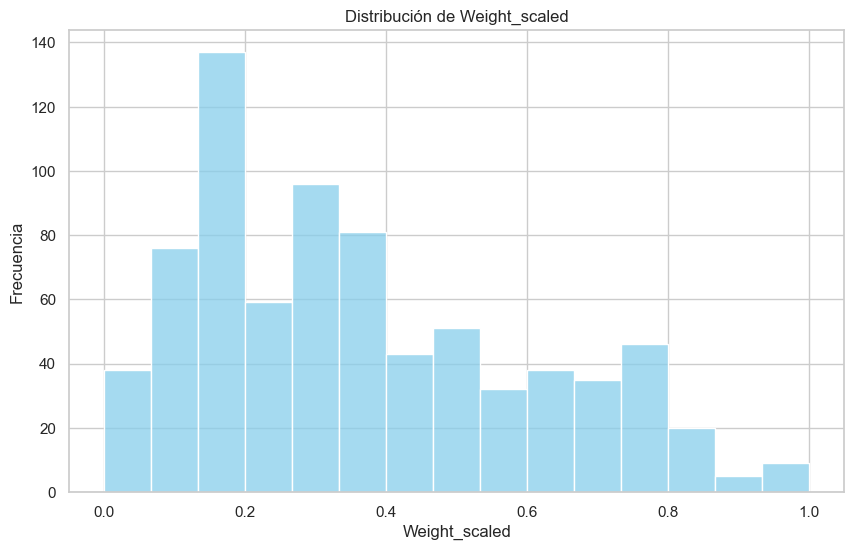

In [165]:
# Convertir la columna de PySpark a pandas
pandas_df = data_with_category_scaled.select('Weight_scaled').toPandas()

# Histograma para visualizar la distribución de los datos
plt.figure(figsize=(10, 6))
sns.histplot(pandas_df['Weight_scaled'], kde=False, color='skyblue', bins=15)
plt.title('Distribución de Weight_scaled')
plt.xlabel('Weight_scaled')
plt.ylabel('Frecuencia')
plt.show()

### 2. **Histograma para `Acceleration_scaled`:**

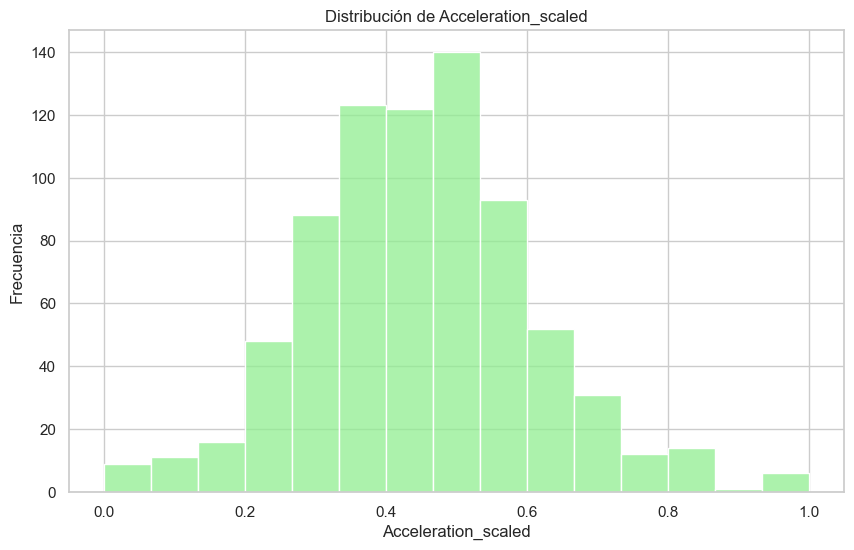

In [167]:
# Convertir la columna de PySpark a pandas
pandas_df_acc = data_with_category_scaled.select('Acceleration_scaled').toPandas()

# Histograma para visualizar la distribución de Acceleration_scaled
plt.figure(figsize=(10, 6))
sns.histplot(pandas_df_acc['Acceleration_scaled'], kde=False, color='lightgreen', bins=15)
plt.title('Distribución de Acceleration_scaled')
plt.xlabel('Acceleration_scaled')
plt.ylabel('Frecuencia')
plt.show()

### 3. **Gráfico de dispersión para `Weight_scaled` vs `Horsepower_scaled`:**

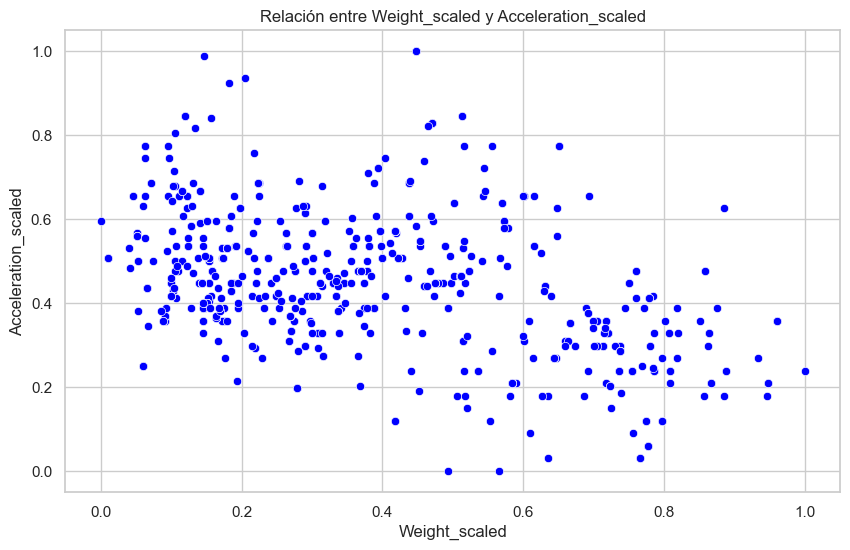

In [168]:
# Convertir las columnas de PySpark a pandas
pandas_df_wa = data_with_category_scaled.select('Weight_scaled', 'Acceleration_scaled').toPandas()

# Gráfico de dispersión entre Weight_scaled y Acceleration_scaled
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pandas_df_wa, x='Weight_scaled', y='Acceleration_scaled', color='blue')
plt.title('Relación entre Weight_scaled y Acceleration_scaled')
plt.xlabel('Weight_scaled')
plt.ylabel('Acceleration_scaled')
plt.show()

### 4. **Gráfico de dispersión para `Weight_scaled` vs `Acceleration_scaled`:**

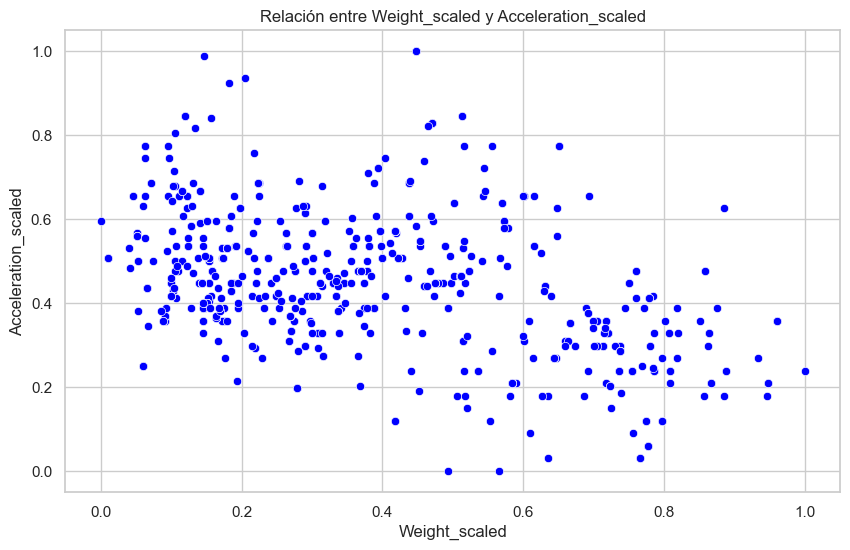

In [169]:
# Convertir las columnas de PySpark a pandas
pandas_df_wa = data_with_category_scaled.select('Weight_scaled', 'Acceleration_scaled').toPandas()

# Gráfico de dispersión entre Weight_scaled y Acceleration_scaled
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pandas_df_wa, x='Weight_scaled', y='Acceleration_scaled', color='blue')
plt.title('Relación entre Weight_scaled y Acceleration_scaled')
plt.xlabel('Weight_scaled')
plt.ylabel('Acceleration_scaled')
plt.show()

### 5. **Relaciones entre las características escaladas de los vehículos: Peso, Potencia y Aceleración**

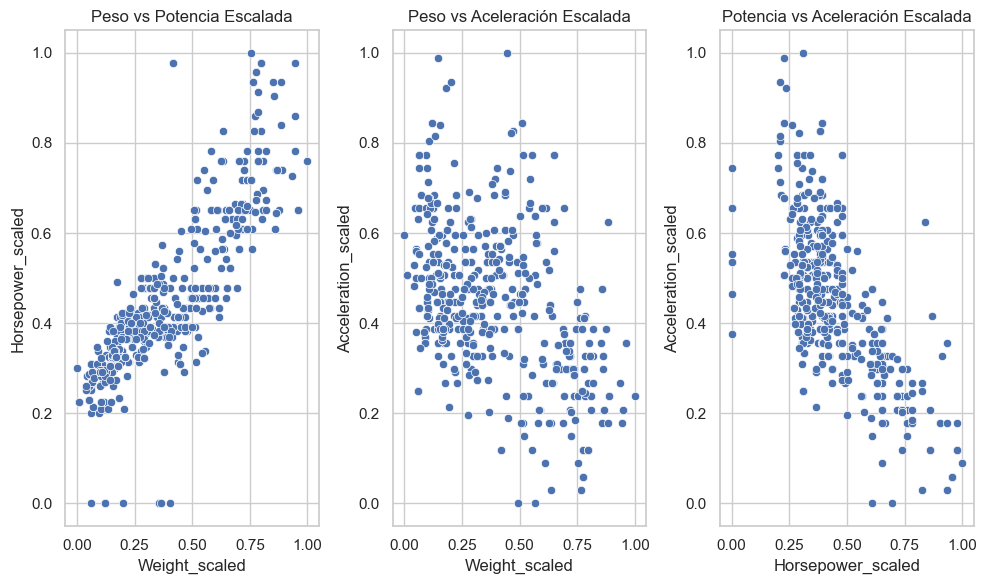

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir el DataFrame de PySpark a pandas
pandas_df = data_with_category_scaled.select("Car", "Weight_scaled", "Horsepower_scaled", "Acceleration_scaled").toPandas()

# Establecer un estilo para las gráficas
sns.set(style="whitegrid")

# Crear una figura para las gráficas
plt.figure(figsize=(10, 6))

# Graficar las tres columnas escaladas en un gráfico de dispersión
plt.subplot(1, 3, 1)
sns.scatterplot(x='Weight_scaled', y='Horsepower_scaled', data=pandas_df)
plt.title('Peso vs Potencia Escalada')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Weight_scaled', y='Acceleration_scaled', data=pandas_df)
plt.title('Peso vs Aceleración Escalada')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Horsepower_scaled', y='Acceleration_scaled', data=pandas_df)
plt.title('Potencia vs Aceleración Escalada')

# Mostrar la gráfica
plt.tight_layout()
plt.show()
